# 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Ignore the system warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

# 3. Setting up the plot style and size

In [3]:
pd.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = (16, 8.27)       #set the graphs size to A4 dimensions
sns.set_style("darkgrid")
sns.set(font_scale = 1.4)

# 4. Import the datasets

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 5. Exploratory Data Analysis (EDA)

Let's get deeper into the dataset and explore the data for better understanding.

# 5.1. For the "train" Dataset

(A). How does the data looks like ?

In [5]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


(B). How big is the data ?

In [6]:
train.shape

(32561, 15)

(C). What is the datatype of the columns ?

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


(D). How does the data looks mathematically ?

In [8]:
train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


(E). Are there any missing values in the dataset ?

In [9]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

(F). Are there any duplicate values in the dataset ?

In [10]:
train.duplicated().sum()

24

(G). How is the correlation between the columns ?

In [11]:
train.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


(H). Find out the numerical features.

In [12]:
numerical_features = [feature for feature in train.columns if train[feature].dtype != "O"]
numerical_features

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

(I). Find out the categorical features.

In [13]:
categorical_features = [feature for feature in  train.columns if  train[feature].dtype == "O" and feature != "income"]
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

(J). Find out the distinct values for each numerical and categorical feature.

In [14]:
train.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

(K). For the each categorical value, we calculate the relative frequency of unique classes.

In [15]:
for feature in categorical_features:
    freq = train[feature].value_counts("f").rename_axis(feature).reset_index(name = "relative frequency")
    print("\n")
    print(freq)



          workclass  relative frequency
0           Private            0.697030
1  Self-emp-not-inc            0.078038
2         Local-gov            0.064279
3                 ?            0.056386
4         State-gov            0.039864
5      Self-emp-inc            0.034274
6       Federal-gov            0.029483
7       Without-pay            0.000430
8      Never-worked            0.000215


       education  relative frequency
0        HS-grad            0.322502
1   Some-college            0.223918
2      Bachelors            0.164461
3        Masters            0.052916
4      Assoc-voc            0.042443
5           11th            0.036086
6     Assoc-acdm            0.032769
7           10th            0.028654
8        7th-8th            0.019840
9    Prof-school            0.017690
10           9th            0.015786
11          12th            0.013298
12     Doctorate            0.012684
13       5th-6th            0.010227
14       1st-4th            0.005160
15  

(L). Check for imbalanced target value and find out what are the % of the classes of the D.V upto 2 decimal points.

In [16]:
round(train["income"].value_counts("f")*100, 2)

<=50K    75.92
>50K     24.08
Name: income, dtype: float64

# Now let's find out some of the graphs for "train" dataset in order to find any key relationships

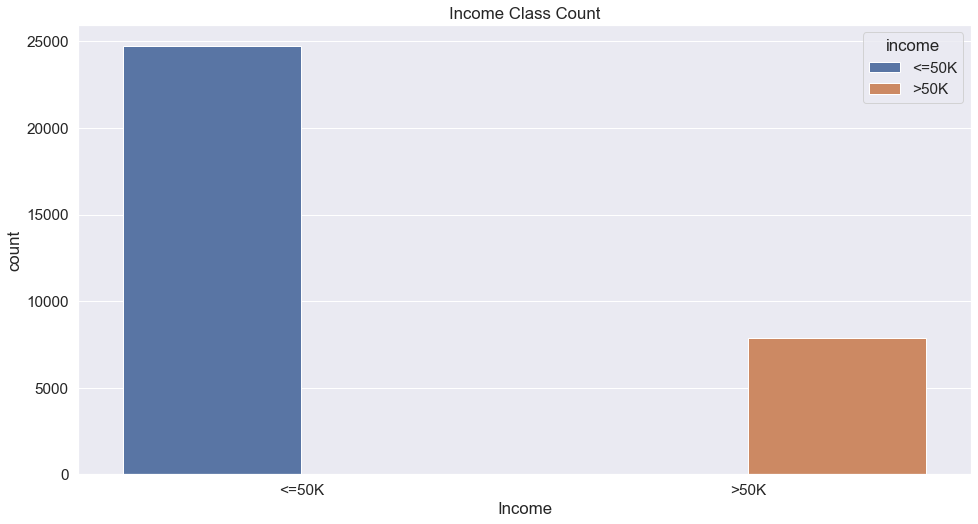

In [17]:
ax = sns.countplot(train["income"], hue = train["income"])
ax.set_title("Income Class Count")
ax.set_xlabel("Income")
plt.show()

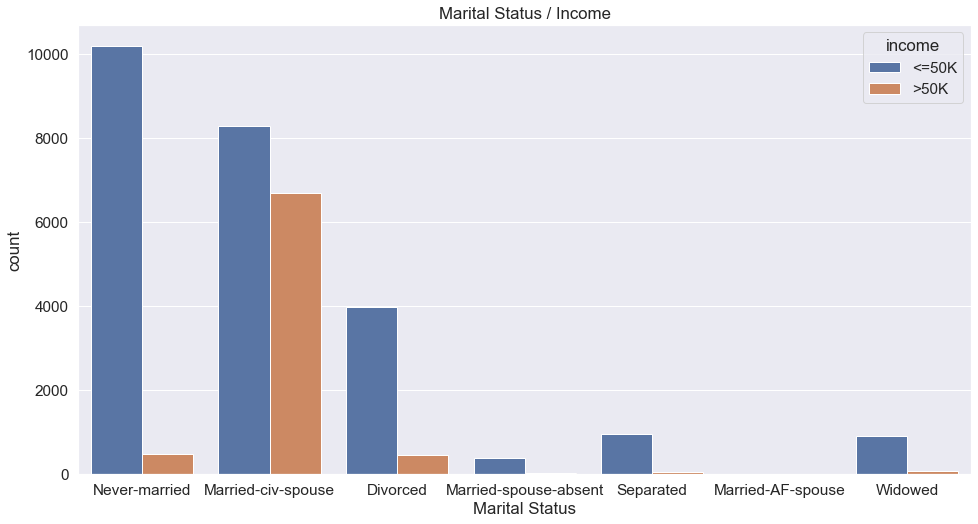

In [18]:
ax = sns.countplot(train["marital-status"], hue = train["income"])
ax.set_title("Marital Status / Income")
ax.set_xlabel("Marital Status")
plt.show()

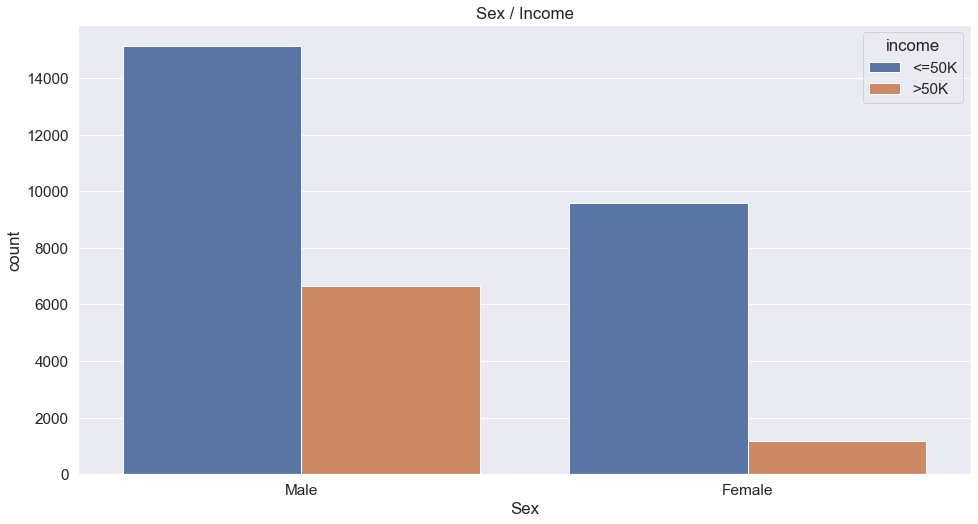

In [19]:
ax = sns.countplot(train["sex"], hue = train["income"])
ax.set_title("Sex / Income")
ax.set_xlabel("Sex")
plt.show()

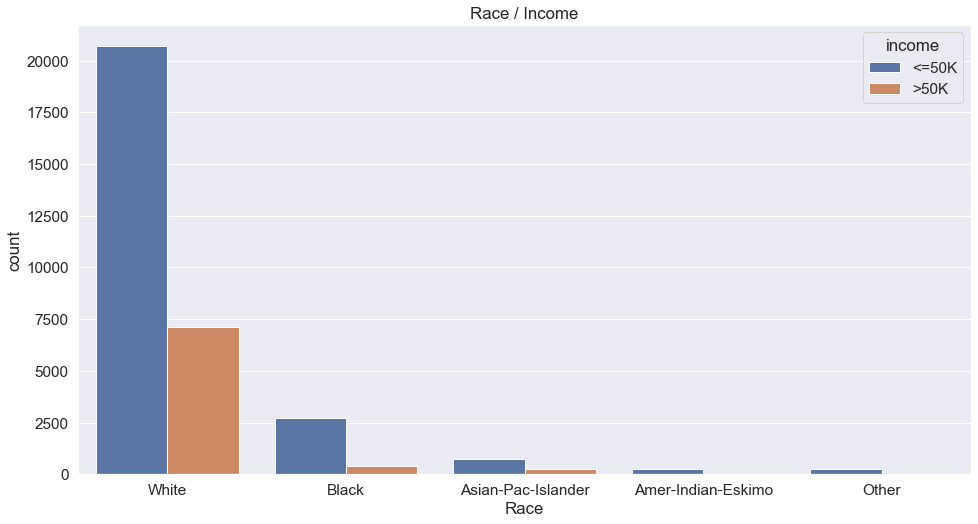

In [20]:
ax = sns.countplot(train["race"], hue = train["income"])
ax.set_title("Race / Income")
ax.set_xlabel("Race")
plt.show()

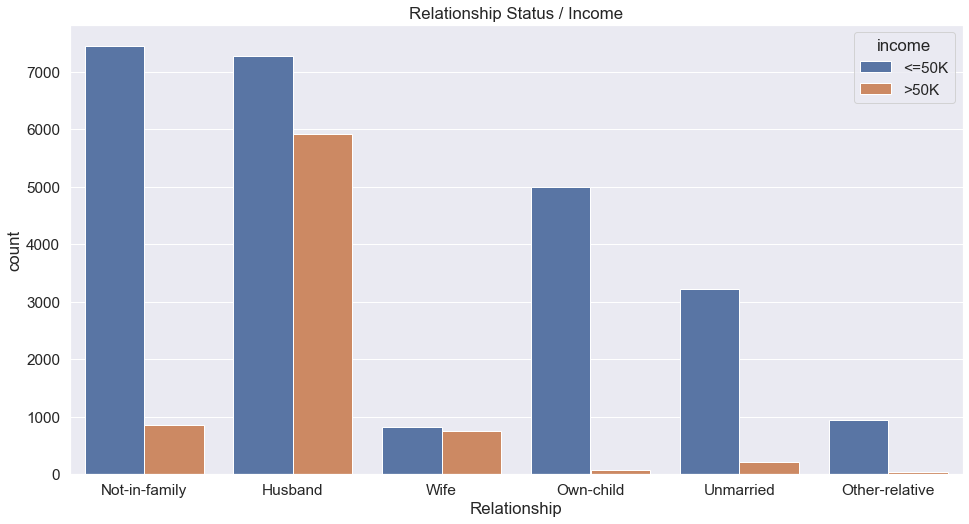

In [21]:
ax = sns.countplot(train["relationship"], hue = train["income"])
ax.set_title("Relationship Status / Income")
ax.set_xlabel("Relationship")
plt.show()

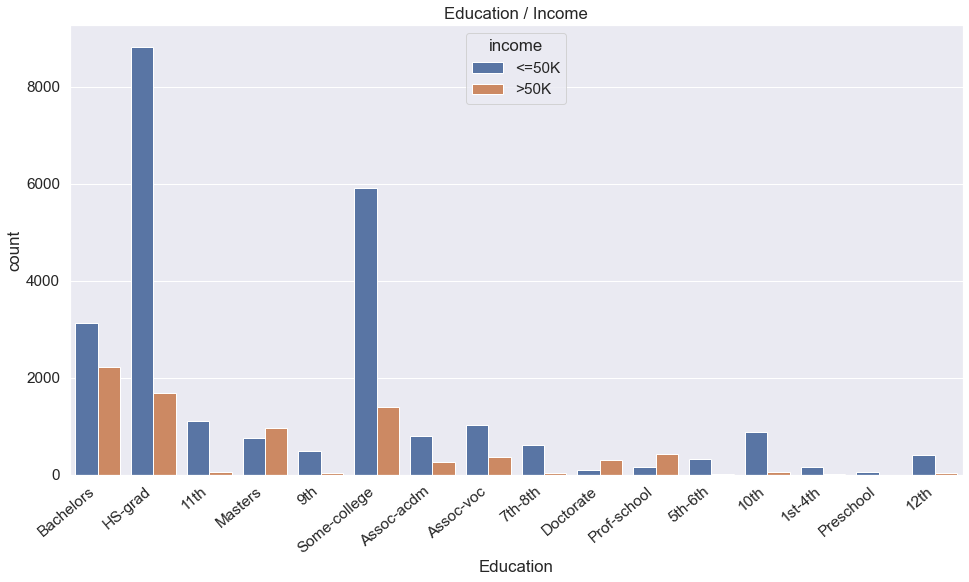

In [22]:
ax = sns.countplot(train["education"], hue = train["income"])
ax.set_title("Education / Income")
ax.set_xlabel("Education")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

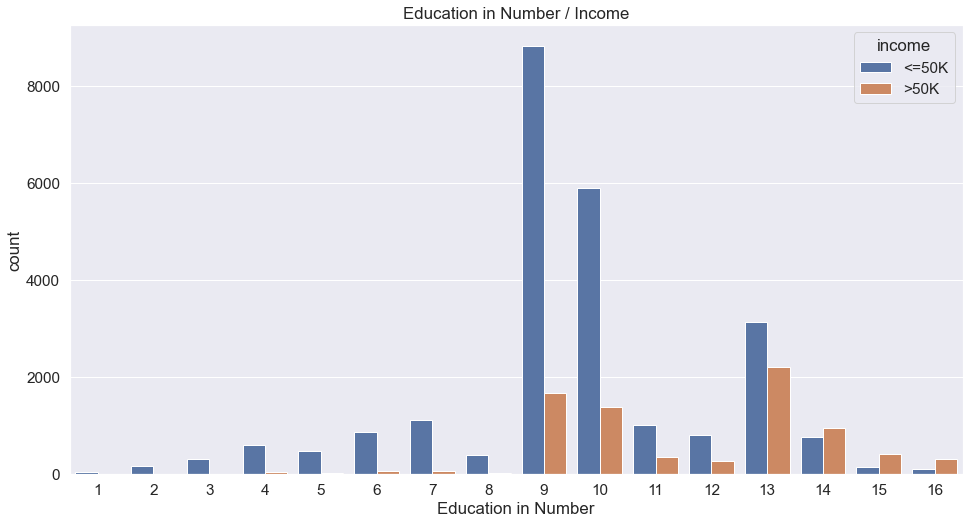

In [23]:
ax = sns.countplot(train["education-num"], hue = train["income"])
ax.set_title("Education in Number / Income")
ax.set_xlabel("Education in Number")
plt.show()

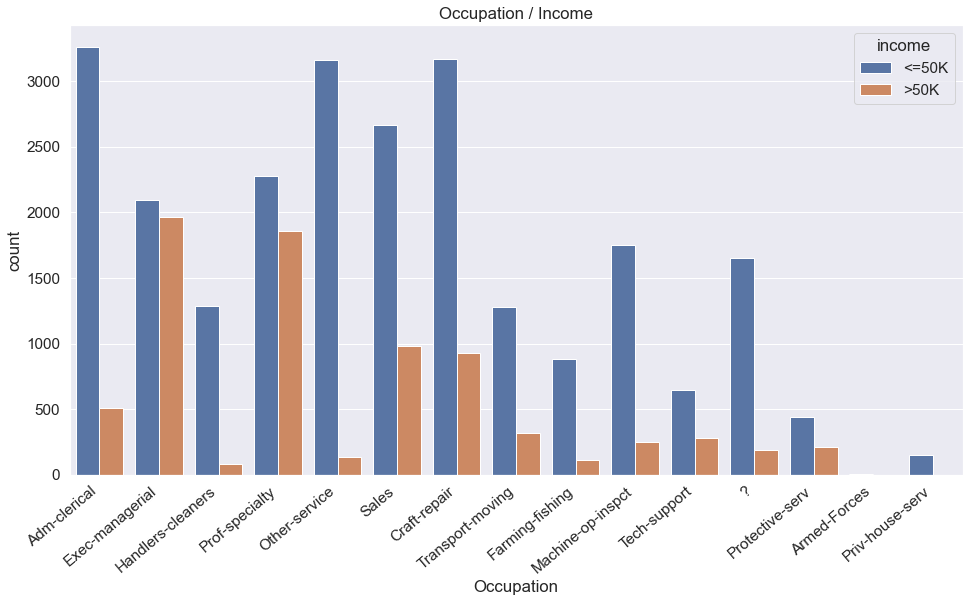

In [24]:
ax = sns.countplot(train["occupation"], hue = train["income"])
ax.set_title("Occupation / Income")
ax.set_xlabel("Occupation")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

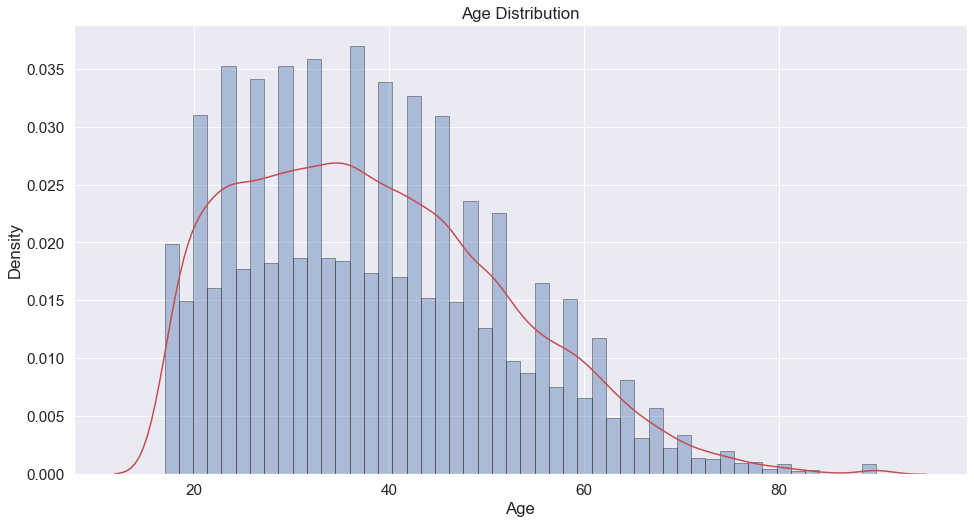

In [25]:
ax = sns.distplot(train["age"], hist_kws = dict(edgecolor = "k"), kde_kws = dict(color = "r"))
ax.set_title("Age Distribution")
ax.set_xlabel("Age")
plt.show()

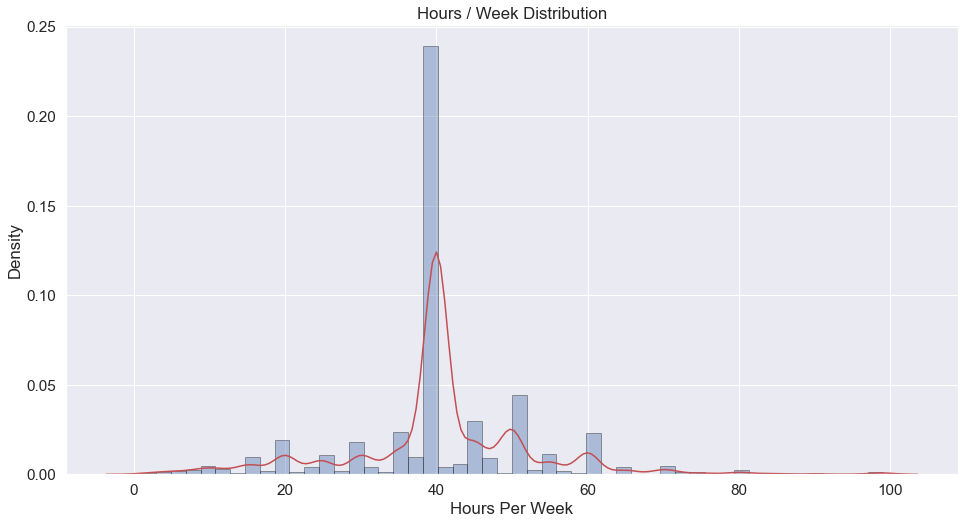

In [26]:
ax = sns.distplot(train["hours-per-week"], hist_kws = dict(edgecolor = "k"), kde_kws = dict(color = "r"))
ax.set_title("Hours / Week Distribution")
ax.set_xlabel("Hours Per Week")
plt.show()

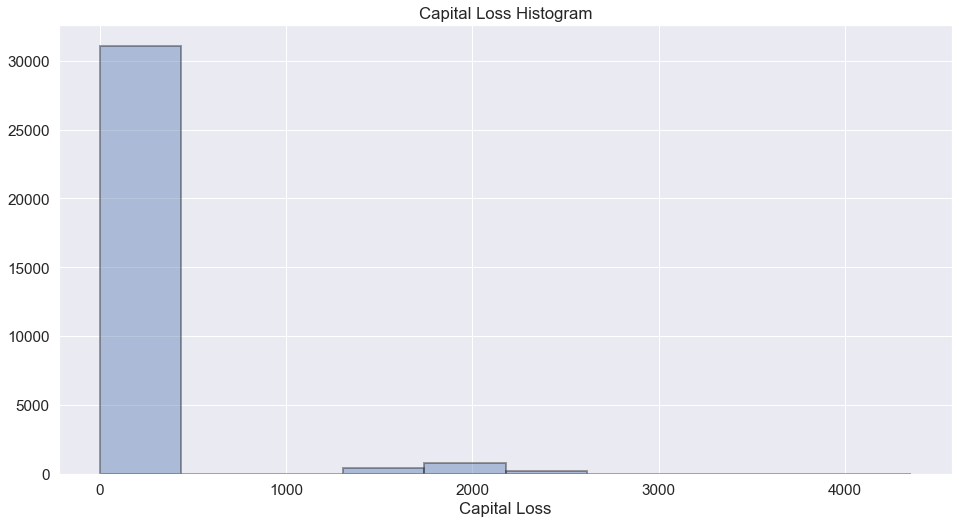

In [27]:
ax = sns.distplot(train["capital-loss"], bins = 10, kde = False, hist_kws = dict(edgecolor = "k", linewidth = 2))
ax.set_title("Capital Loss Histogram")
ax.set_xlabel("Capital Loss")
plt.show()

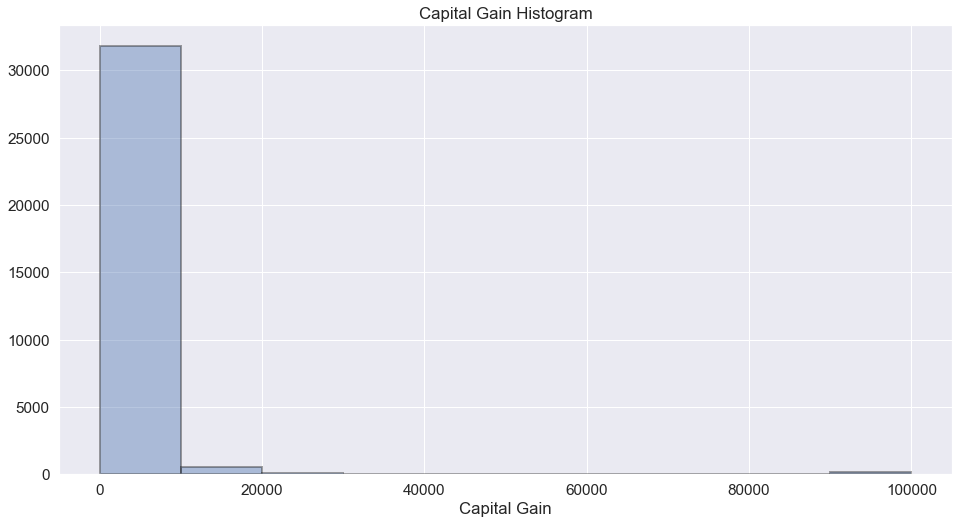

In [28]:
ax = sns.distplot(train["capital-gain"], bins = 10, kde = False, hist_kws = dict(edgecolor = "k", linewidth = 2))
ax.set_title("Capital Gain Histogram")
ax.set_xlabel("Capital Gain")
plt.show()

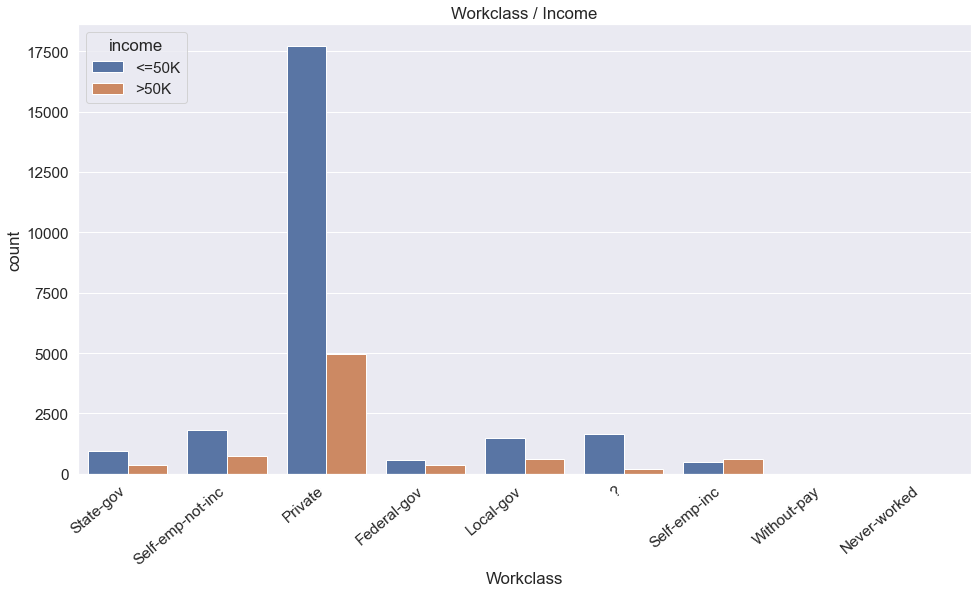

In [29]:
ax = sns.countplot(train["workclass"], hue = train["income"])
ax.set_title("Workclass / Income")
ax.set_xlabel("Workclass")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

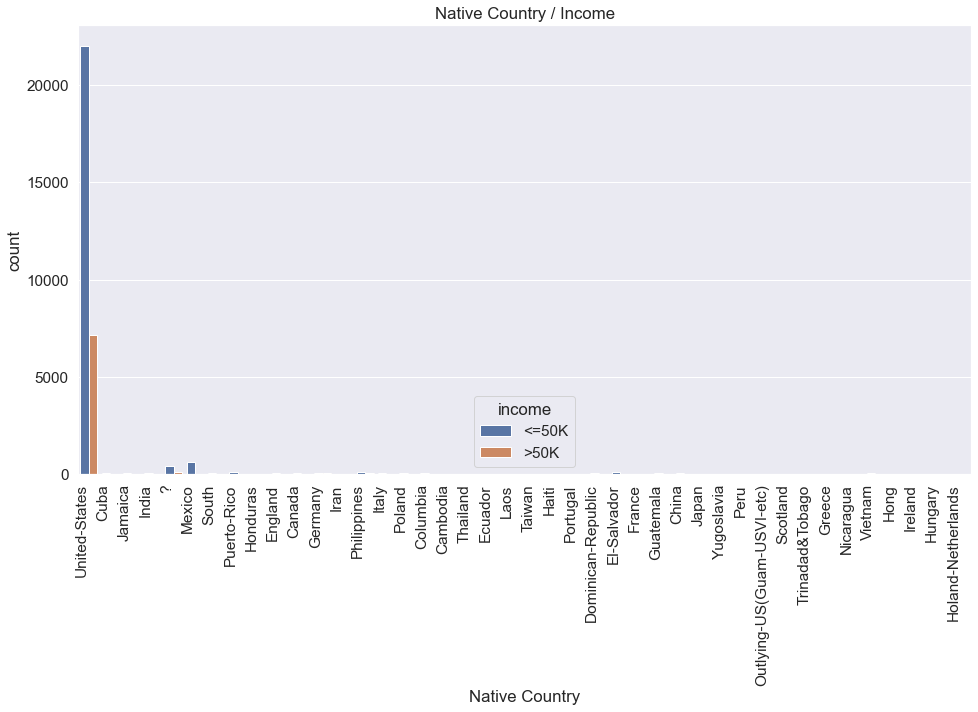

In [30]:
ax = sns.countplot(train["native-country"], hue = train["income"])
ax.set_title("Native Country / Income")
ax.set_xlabel("Native Country")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = "right")
plt.show()

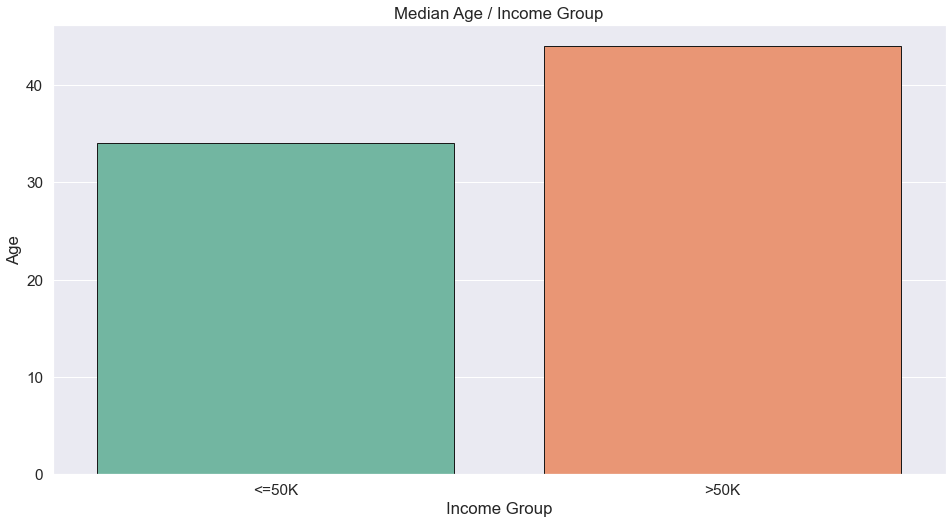

In [31]:
# Median age for each income group

ax = sns.barplot(train.groupby("income")["age"].median().index, train.groupby("income")["age"].median().values, edgecolor = "k", palette = "Set2")
ax.set_ylabel("Age")
ax.set_xlabel("Income Group")
ax.set_title("Median Age / Income Group")
plt.show()

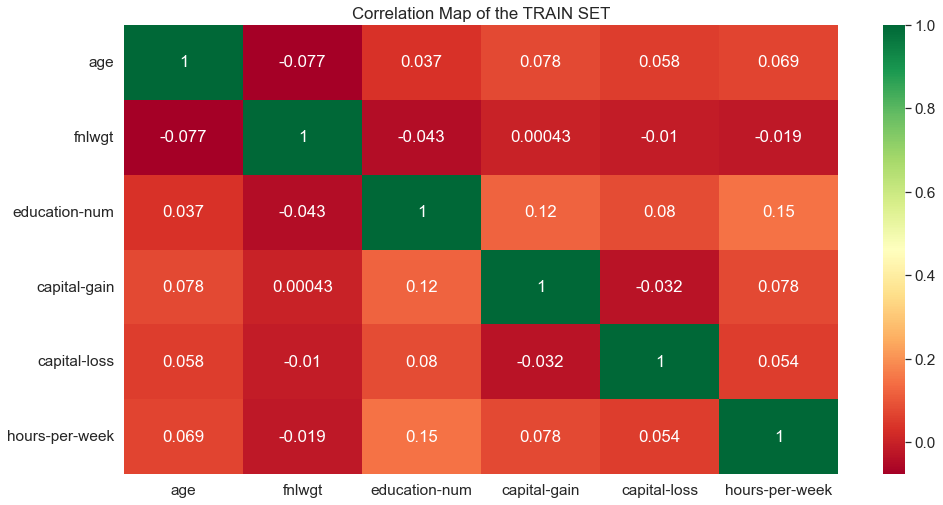

In [32]:
# Plotting the correlation map of the "train" set

corr_train = train.copy()
for feature in categorical_features:
    corr_train.drop(feature, axis = 1, inplace = True)
    
ax = sns.heatmap(corr_train.corr(), cmap = "RdYlGn", annot = True)
ax.set_title("Correlation Map of the TRAIN SET")
plt.show()

# 5.2 For the "test" Dataset

(A). How does the data looks like ?

In [33]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


(B). How big is the data ?

In [34]:
test.shape

(16281, 15)

(C). What is the datatype of the columns ?

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


(D). How does the data looks mathematically ?

In [36]:
test.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


(E). Are there any missing values in the dataset ?

In [37]:
test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

(F). Are there any duplicate values in the dataset ?

In [38]:
test.duplicated().sum()

5

(G). How is the correlation between the columns ?

In [39]:
test.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076574,0.019945,0.076377,0.055302,0.077058
fnlwgt,-0.076574,1.000000,-0.029896,-0.011753,0.007386,-0.003155
education-num,0.019945,-0.029896,1.000000,0.130092,0.083077,0.134899
capital-gain,0.076377,-0.011753,0.130092,1.000000,-0.031109,0.089390
capital-loss,0.055302,0.007386,0.083077,-0.031109,1.000000,0.054890
hours-per-week,0.077058,-0.003155,0.134899,0.089390,0.054890,1.000000


(H). Find out the numerical features.

In [40]:
numerical_features = [feature for feature in test.columns if test[feature].dtype != "O"]
numerical_features

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

(I). Find out the categorical features.

In [41]:
categorical_features = [feature for feature in  test.columns if  test[feature].dtype == "O" and feature != "income"]
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

(J). Find out the distinct values for each numerical and categorical feature.

In [42]:
test.nunique()

age                  73
workclass             9
fnlwgt            12787
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        113
capital-loss         82
hours-per-week       89
native-country       41
income                2
dtype: int64

(K). For the each categorical value, we calculate the relative frequency of unique classes.

In [43]:
for feature in categorical_features:
    freq = test[feature].value_counts("f").rename_axis(feature).reset_index(name = "relative frequency")
    print("\n")
    print(freq)



          workclass  relative frequency
0           Private            0.688533
1  Self-emp-not-inc            0.081138
2         Local-gov            0.064062
3                 ?            0.059149
4         State-gov            0.041951
5      Self-emp-inc            0.035563
6       Federal-gov            0.028991
7       Without-pay            0.000430
8      Never-worked            0.000184


       education  relative frequency
0        HS-grad            0.324489
1   Some-college            0.220318
2      Bachelors            0.163995
3        Masters            0.057367
4      Assoc-voc            0.041705
5           11th            0.039125
6     Assoc-acdm            0.032799
7           10th            0.028008
8        7th-8th            0.018979
9    Prof-school            0.015847
10           9th            0.014864
11          12th            0.013758
12     Doctorate            0.011117
13       5th-6th            0.010810
14       1st-4th            0.004852
15  

(L). Check for imbalanced target value and find out what are the % of the classes of the D.V upto 2 decimal points.

In [44]:
round(test["income"].value_counts("f")*100, 2)

<=50K    76.38
>50K     23.62
Name: income, dtype: float64

# Now let's find out some of the graphs for "test" dataset in order to find any key relationships

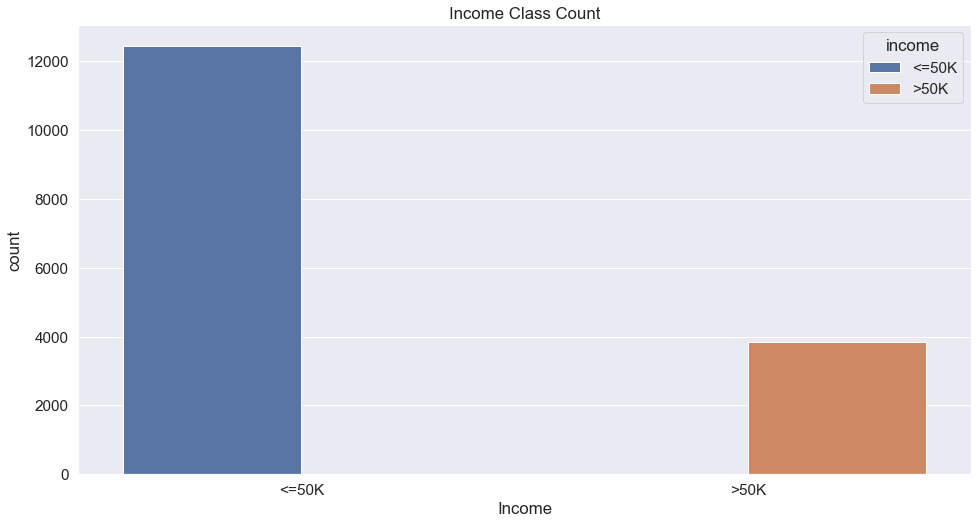

In [45]:
ax = sns.countplot(test["income"], hue = test["income"])
ax.set_title("Income Class Count")
ax.set_xlabel("Income")
plt.show()

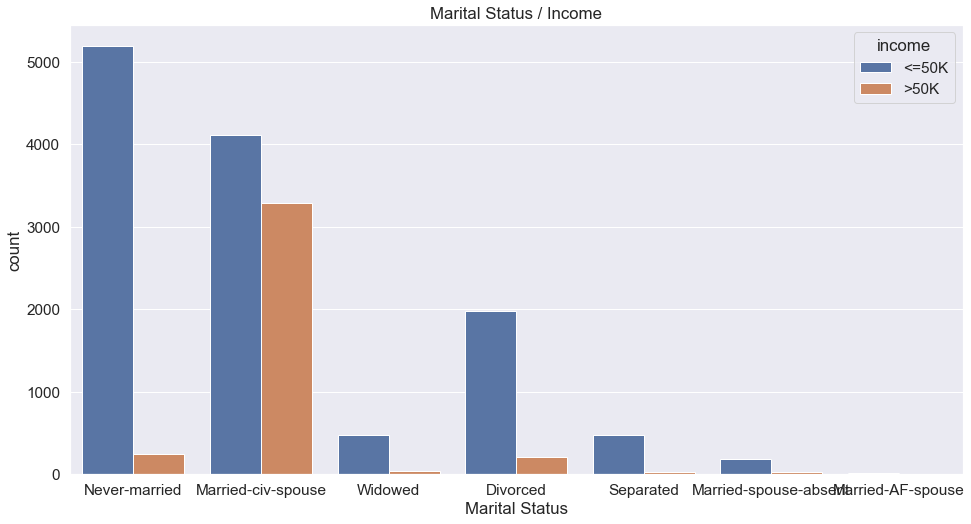

In [46]:
ax = sns.countplot(test["marital-status"], hue = test["income"])
ax.set_title("Marital Status / Income")
ax.set_xlabel("Marital Status")
plt.show()

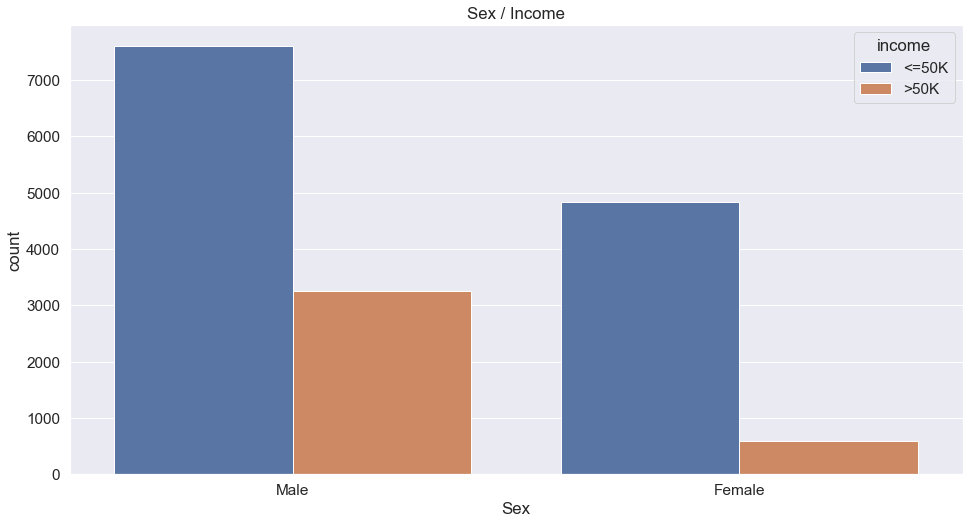

In [47]:
ax = sns.countplot(test["sex"], hue = test["income"])
ax.set_title("Sex / Income")
ax.set_xlabel("Sex")
plt.show()

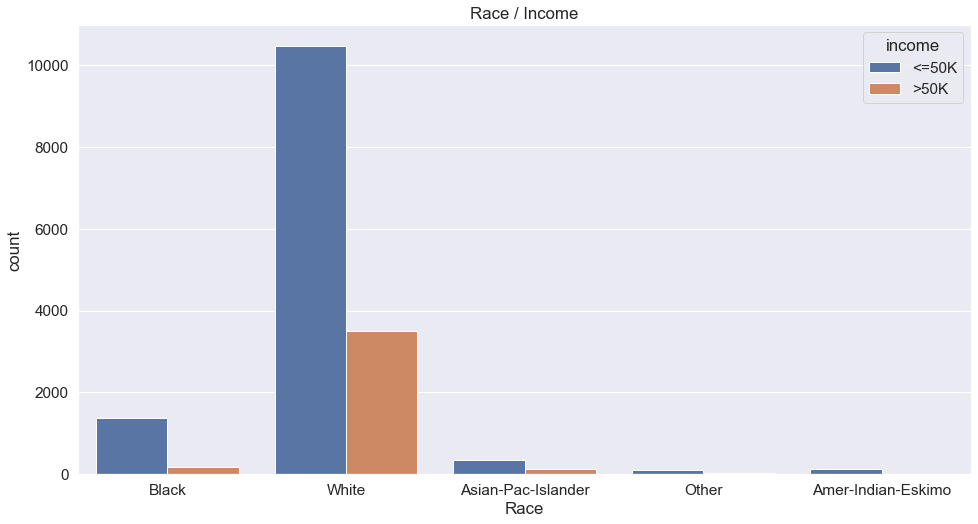

In [48]:
ax = sns.countplot(test["race"], hue = test["income"])
ax.set_title("Race / Income")
ax.set_xlabel("Race")
plt.show()

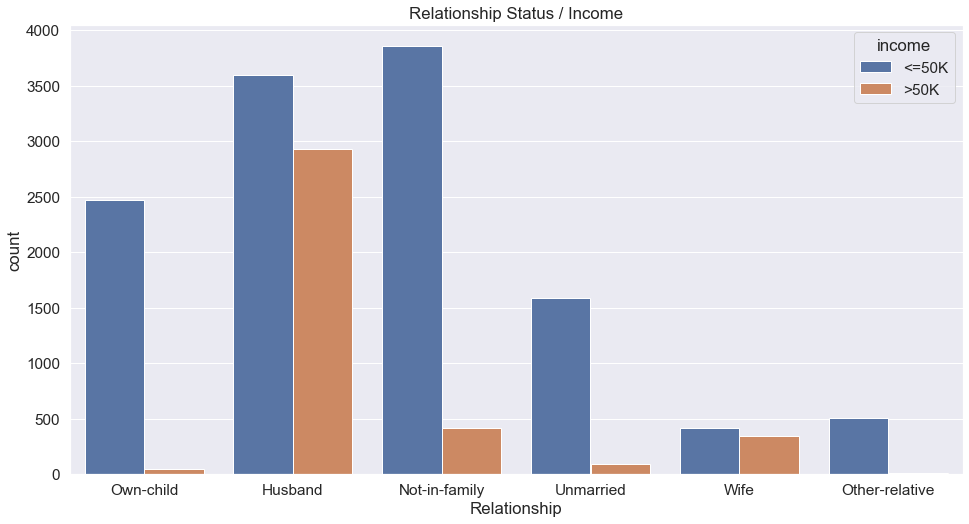

In [49]:
ax = sns.countplot(test["relationship"], hue = test["income"])
ax.set_title("Relationship Status / Income")
ax.set_xlabel("Relationship")
plt.show()

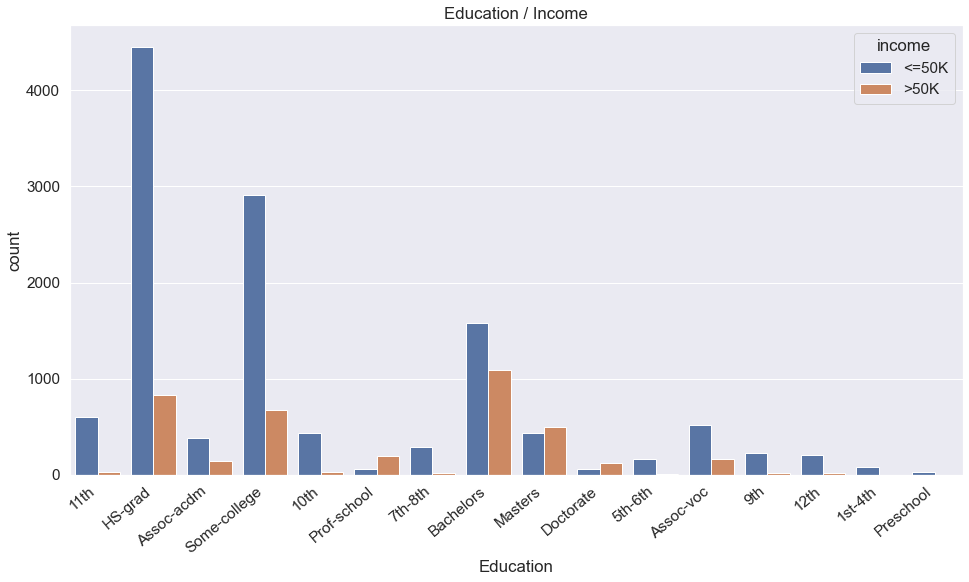

In [50]:
ax = sns.countplot(test["education"], hue = test["income"])
ax.set_title("Education / Income")
ax.set_xlabel("Education")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

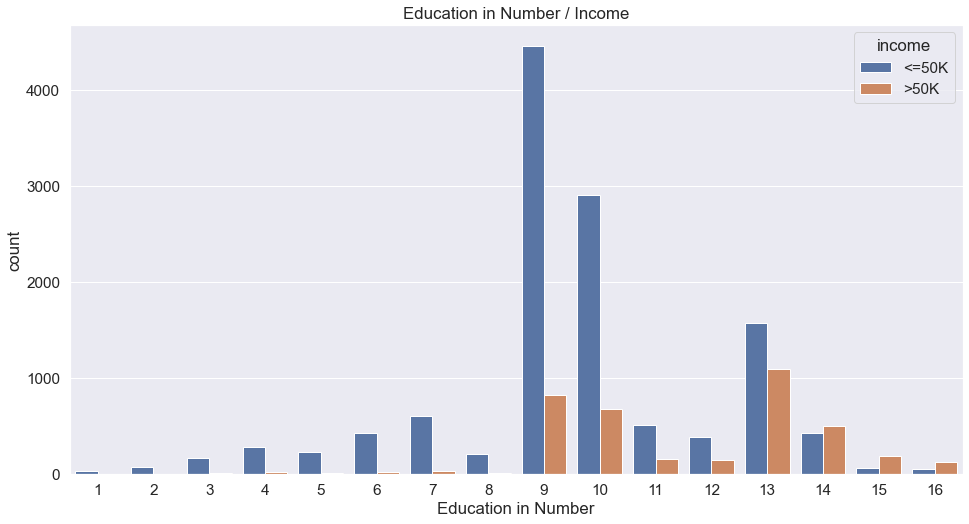

In [51]:
ax = sns.countplot(test["education-num"], hue = test["income"])
ax.set_title("Education in Number / Income")
ax.set_xlabel("Education in Number")
plt.show()

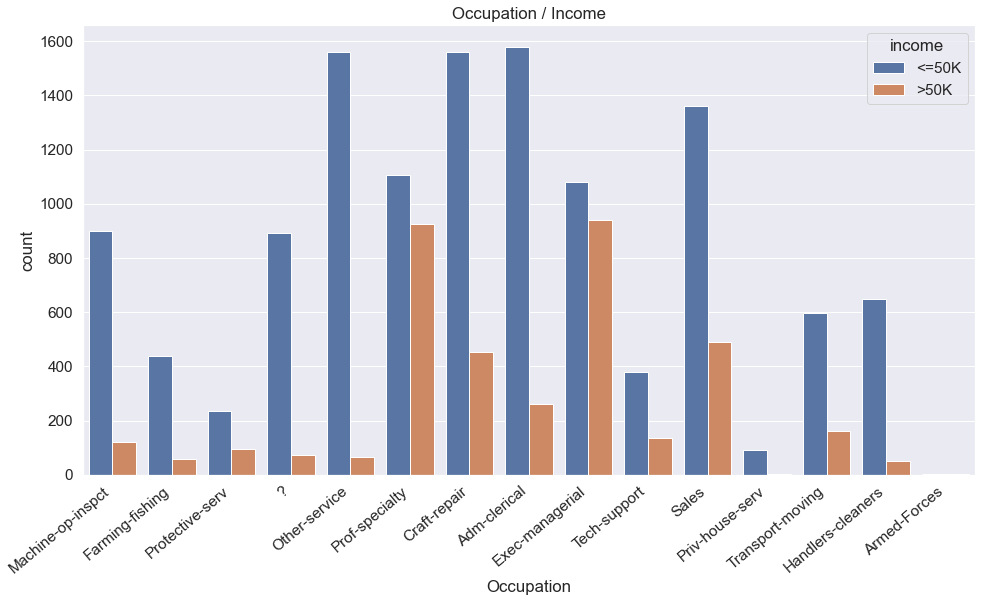

In [52]:
ax = sns.countplot(test["occupation"], hue = test["income"])
ax.set_title("Occupation / Income")
ax.set_xlabel("Occupation")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

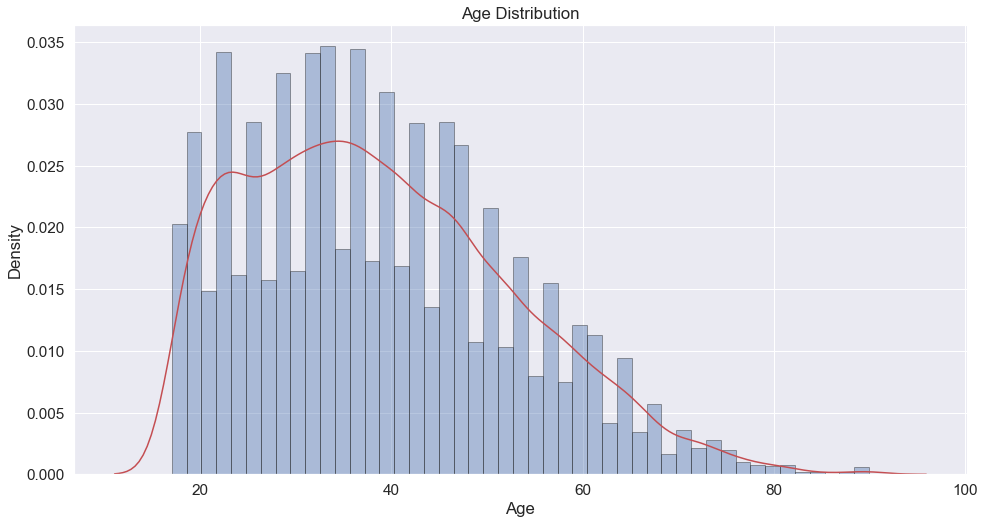

In [53]:
ax = sns.distplot(test["age"], hist_kws = dict(edgecolor = "k"), kde_kws = dict(color = "r"))
ax.set_title("Age Distribution")
ax.set_xlabel("Age")
plt.show()

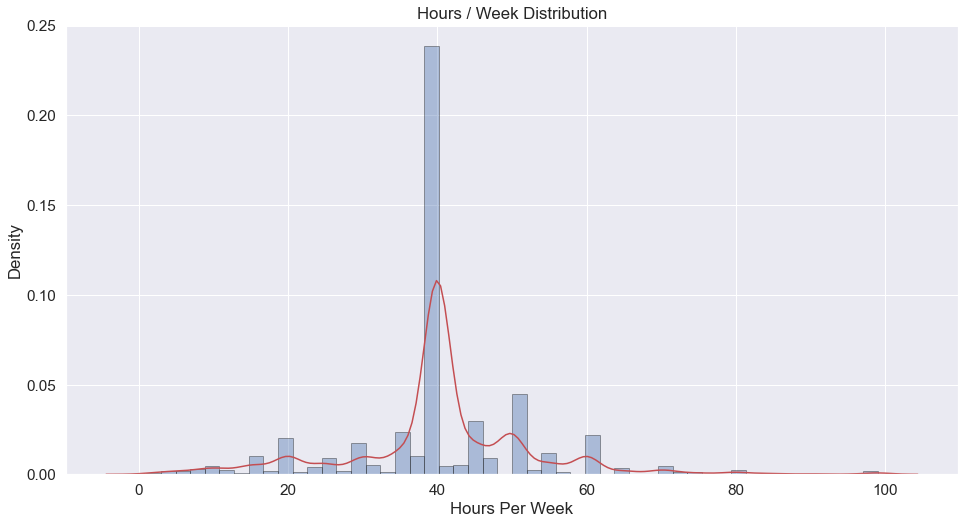

In [54]:
ax = sns.distplot(test["hours-per-week"], hist_kws = dict(edgecolor = "k"), kde_kws = dict(color = "r"))
ax.set_title("Hours / Week Distribution")
ax.set_xlabel("Hours Per Week")
plt.show()

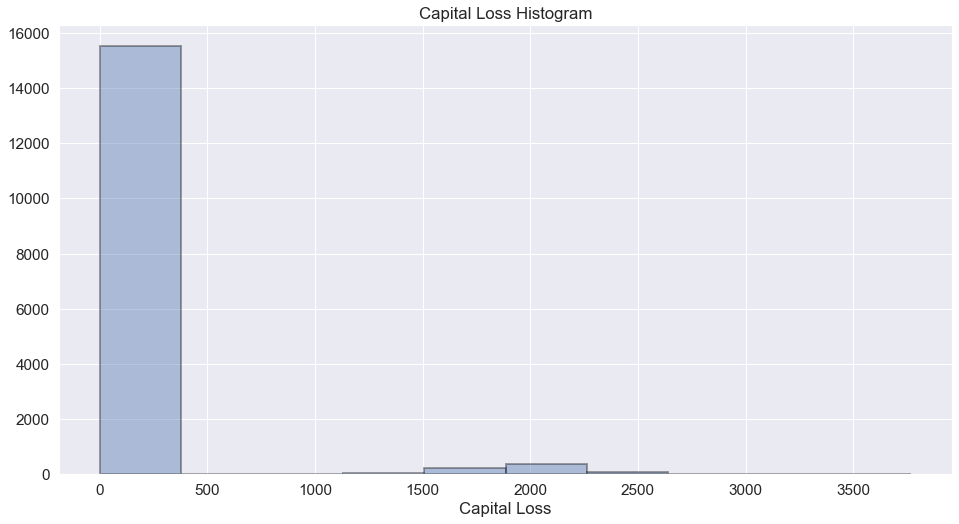

In [55]:
ax = sns.distplot(test["capital-loss"], bins = 10, kde = False, hist_kws = dict(edgecolor = "k", linewidth = 2))
ax.set_title("Capital Loss Histogram")
ax.set_xlabel("Capital Loss")
plt.show()

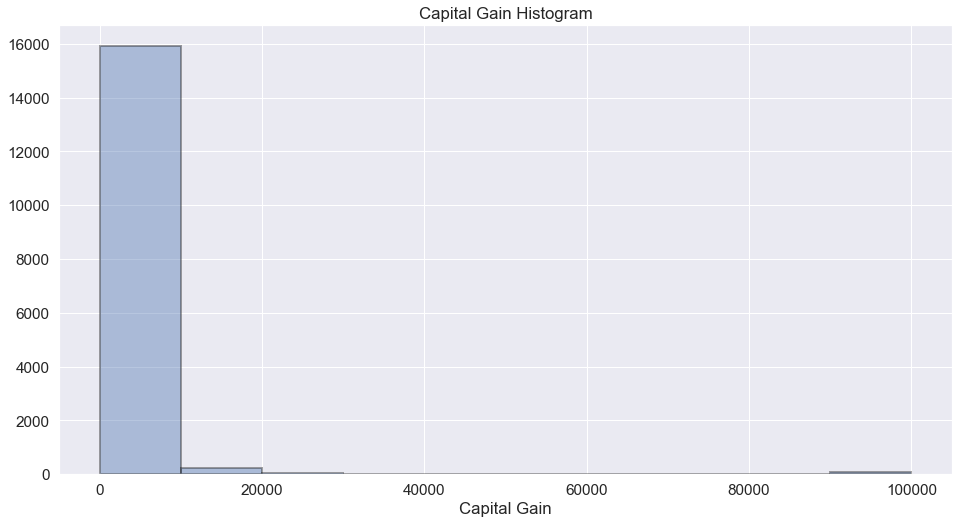

In [56]:
ax = sns.distplot(test["capital-gain"], bins = 10, kde = False, hist_kws = dict(edgecolor = "k", linewidth = 2))
ax.set_title("Capital Gain Histogram")
ax.set_xlabel("Capital Gain")
plt.show()

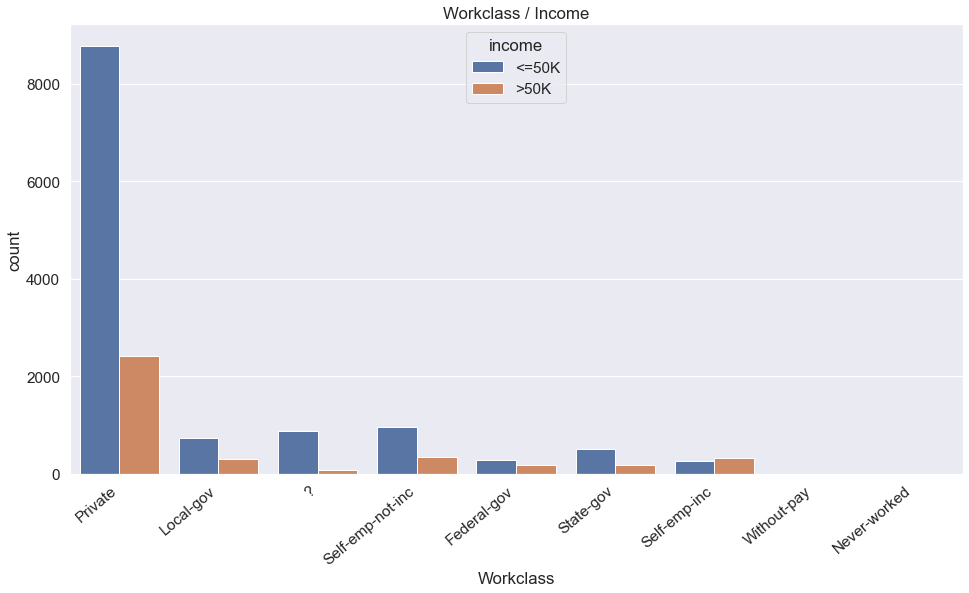

In [57]:
ax = sns.countplot(test["workclass"], hue = test["income"])
ax.set_title("Workclass / Income")
ax.set_xlabel("Workclass")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

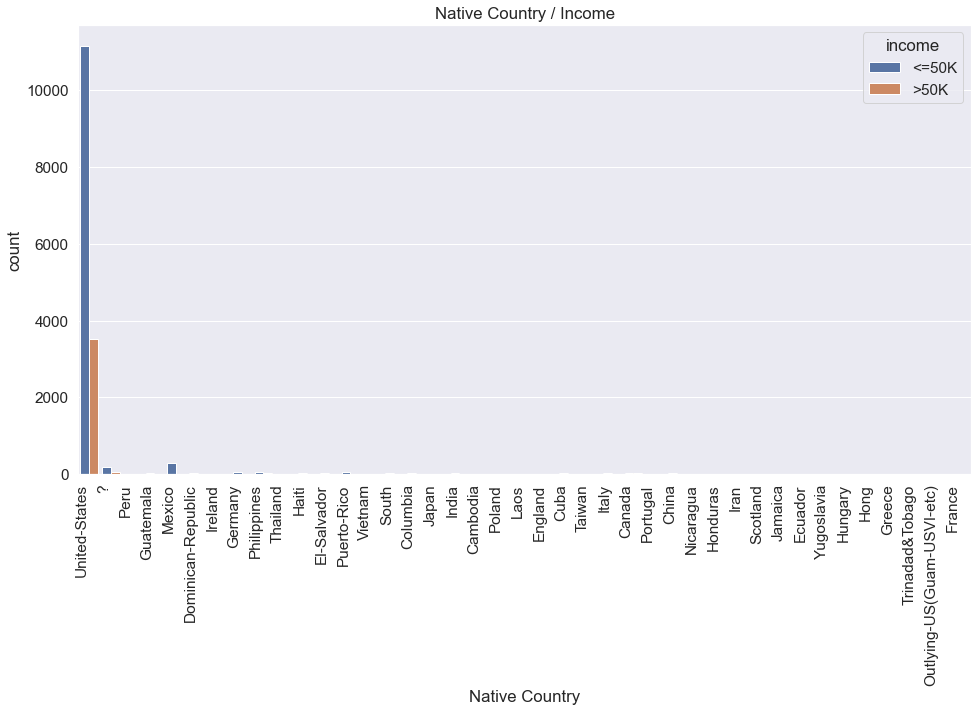

In [58]:
ax = sns.countplot(test["native-country"], hue = test["income"])
ax.set_title("Native Country / Income")
ax.set_xlabel("Native Country")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = "right")
plt.show()

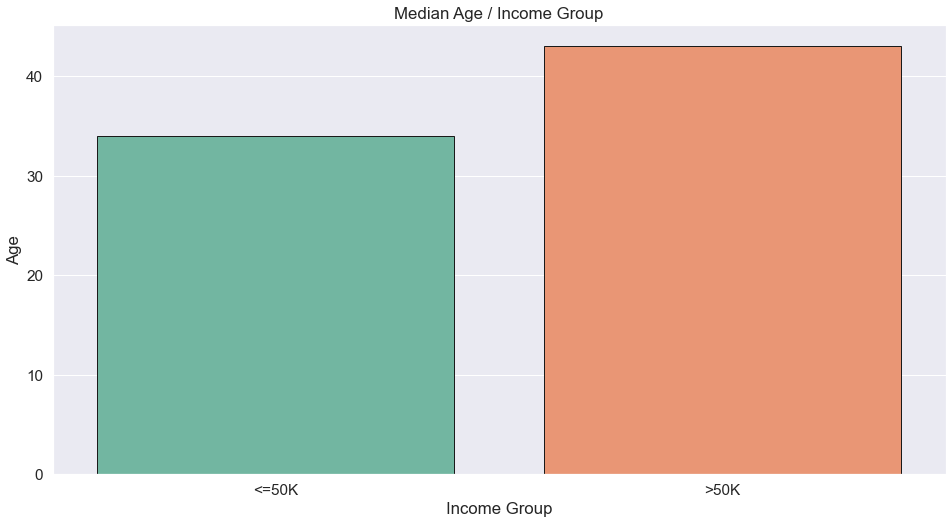

In [59]:
# Median age for each income group

ax = sns.barplot(test.groupby("income")["age"].median().index, test.groupby("income")["age"].median().values, edgecolor = "k", palette = "Set2")
ax.set_ylabel("Age")
ax.set_xlabel("Income Group")
ax.set_title("Median Age / Income Group")
plt.show()

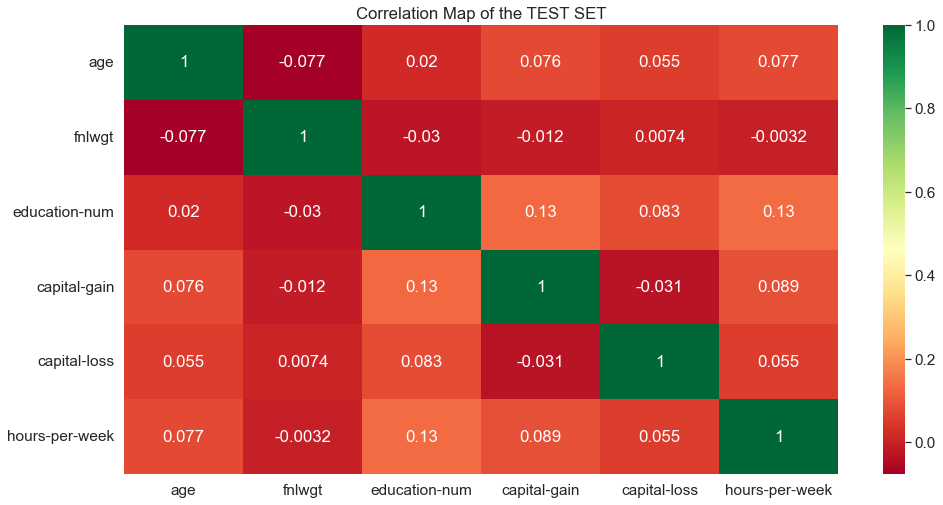

In [60]:
# Plotting the correlation map of the "test" set

corr_test = test.copy()
for feature in categorical_features:
    corr_test.drop(feature, axis = 1, inplace = True)
    
ax = sns.heatmap(corr_test.corr(), cmap = "RdYlGn", annot = True)
ax.set_title("Correlation Map of the TEST SET")
plt.show()

# 6. Feature Engineering

# 6.1. For the "train" Set

In [61]:
# Label Encoding the D.V
# Convert "<=50K" to "0" and ">50K" to "1" respectively

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train["income"] = encoder.fit_transform(train["income"])

In [62]:
# Finding out the frequency of values in each of the categorical attributes

categorical_features = [feature for feature in  train.columns if  train[feature].dtype == "O" and feature != "income"]
for feature in categorical_features:
    freq = train[feature].value_counts().rename_axis(feature).reset_index(name = "frequency")
    print('\n')
    print(freq)



          workclass  frequency
0           Private      22696
1  Self-emp-not-inc       2541
2         Local-gov       2093
3                 ?       1836
4         State-gov       1298
5      Self-emp-inc       1116
6       Federal-gov        960
7       Without-pay         14
8      Never-worked          7


       education  frequency
0        HS-grad      10501
1   Some-college       7291
2      Bachelors       5355
3        Masters       1723
4      Assoc-voc       1382
5           11th       1175
6     Assoc-acdm       1067
7           10th        933
8        7th-8th        646
9    Prof-school        576
10           9th        514
11          12th        433
12     Doctorate        413
13       5th-6th        333
14       1st-4th        168
15     Preschool         51


          marital-status  frequency
0     Married-civ-spouse      14976
1          Never-married      10683
2               Divorced       4443
3              Separated       1025
4                Widowed    

In [63]:
# Transform "native-country" feature to be "1" if country is "United States", Otherwise is equal to "0"

train["native-country"] = np.where(train["native-country"] == "United-States", 1, 0)

In [64]:
# Transform "marital-status" and concatenate some classes to reduce distinct classes

train["marital-status"] = train["marital-status"].replace({"Married-civ-spouse" : "Married", "Never-married" : "Single",  
                                                           "Separated" : "Divorced", "Married-spouse-absent" : "Divorced", 
                                                           "Divorced" : "Divorced", "Married-AF-spouse" : "Divorced", 
                                                           "Widowed" : "Widowed"})

In [65]:
# Transform "workclass" feature to be "1" if the workclass is "Private" and "0" if doesn't

train["workclass"] = np.where(train["workclass"] == "Private", 1, 0)

In [66]:
# Transform "sex" feature to be "1" if the sex is "Male" and "0" if "Female"

train["sex"] = np.where(train["sex"] == "Male", 1, 0)

In [67]:
# Transform "race" feature to be "1" if the race is "White" and "0" if doesn't

train["race"] = np.where(train["race"] == "White", 1, 0)

In [68]:
# Create an ordered label for "education" attribute

education_mapping = {"Preschool" : 0, 
                     "1st-4th" : 1, 
                     "5th-6th" : 2, 
                     "7th-8th" : 3, 
                     "9th" : 4, 
                     "10th" : 5,
                     "11th" : 6, 
                     "12th" : 7, 
                     "HS-grad" : 8, 
                     "Some-college" : 9, 
                     "Assoc-acdm" : 10,
                     "Assoc-voc" : 11, 
                     "Bachelors" : 12, 
                     "Prof-school" : 13, 
                     "Masters" : 14, 
                     "Doctorate" : 15}

train["education"] = train["education"].map(education_mapping)

In [69]:
# Create an ordered label for "relationship" attribute

relationship_ordered = train.groupby(["relationship"])["income"].count().sort_values().index
relationship_ordered = {k:i for i, k in enumerate(relationship_ordered, 0)}
train["relationship"] = train["relationship"].map(relationship_ordered)

In [70]:
# Create an ordered label for "occupation" attribute

occupation_ordered = train.groupby(["occupation"])["income"].count().sort_values().index
occupation_ordered = {k:i for i, k in enumerate(occupation_ordered, 0)}
train["occupation"] = train["occupation"].map(occupation_ordered)

In [71]:
# Create an ordered label for "marital-status" attribute

marital_ordered = train.groupby(["marital-status"])["income"].count().sort_values().index
marital_ordered = {k:i for i, k in enumerate(marital_ordered, 0)}
train["marital-status"] = train["marital-status"].map(marital_ordered)

In [72]:
# Let's check how the data looks like after the completion of the transformation

train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,12,13,2,11,4,1,1,2174,0,40,1,0
1,50,0,83311,12,13,3,12,5,1,1,0,0,13,1,0
2,38,1,215646,8,9,1,5,4,1,1,0,0,40,1,0
3,53,1,234721,6,7,3,5,5,0,1,0,0,40,1,0
4,28,1,338409,12,13,3,14,1,0,0,0,0,40,0,0


In [73]:
# Checking if there is any null values present in the dataset

train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [74]:
# Dropping the "fnlwgt" column from the "train" dataset as it has no contribution to predict the "income" of any person

train.drop("fnlwgt", axis = 1, inplace = True)

In [75]:
# Scaling the "train" dataset with the help of "StandardScaler"

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features_train = scaler.fit_transform(train.drop("income", axis = 1))
scaled_features_train = pd.DataFrame(scaled_features_train, columns = train.drop("income", axis = 1).columns)

In [76]:
# Undersampling the "train" dataset using "imblearn" library

from imblearn.under_sampling import OneSidedSelection
under = OneSidedSelection()
X_train_res, y_train_res = under.fit_resample(scaled_features_train, train["income"])

In [77]:
# Oversampling the "train" dataset using "imblearn" library

from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train_res, y_train_res)
X_train_res = pd.DataFrame(X_train_res, columns = train.drop("income", axis = 1).columns)

In [78]:
# Creating the final "train" dataset by concatinating the X_train_res and y_train_res

final_train = pd.concat([X_train_res, y_train_res], axis = 1)

In [79]:
# Checking how the "final_train" dataset looks like

final_train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,-0.335892,0.659286,-0.047616,-0.031360,0.924726,0.961629,0.902673,0.413020,0.703071,-0.145920,-0.21666,0.774468,0.340954,0
1,0.030671,-1.516792,1.089900,1.134739,-0.256985,0.348115,0.167065,0.413020,0.703071,0.148453,-0.21666,-0.035429,0.340954,0
2,0.837109,-1.516792,1.089900,1.134739,0.924726,0.654872,0.902673,0.413020,0.703071,-0.145920,-0.21666,-2.222153,0.340954,0
3,-0.042642,0.659286,-0.426788,-0.420060,-1.438697,-1.492427,0.167065,0.413020,0.703071,-0.145920,-0.21666,-0.035429,0.340954,0
4,1.057047,0.659286,-1.185132,-1.197459,0.924726,-1.492427,0.902673,-2.421192,0.703071,-0.145920,-0.21666,-0.035429,0.340954,0


In [80]:
# Checking the datatype of the columns of the "final_train" dataset

final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47286 entries, 0 to 47285
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             47286 non-null  float64
 1   workclass       47286 non-null  float64
 2   education       47286 non-null  float64
 3   education-num   47286 non-null  float64
 4   marital-status  47286 non-null  float64
 5   occupation      47286 non-null  float64
 6   relationship    47286 non-null  float64
 7   race            47286 non-null  float64
 8   sex             47286 non-null  float64
 9   capital-gain    47286 non-null  float64
 10  capital-loss    47286 non-null  float64
 11  hours-per-week  47286 non-null  float64
 12  native-country  47286 non-null  float64
 13  income          47286 non-null  int32  
dtypes: float64(13), int32(1)
memory usage: 4.9 MB


In [81]:
# Checking if the "final_train" dataset is balanced or not after "under_sampling" and "over_sampling" it

final_train["income"].value_counts()

0    23643
1    23643
Name: income, dtype: int64

# 6.2. For the "test" Set

In [82]:
# Convert "<=50K" to "0" and ">50K" to "1" respectively

test["income"] = np.where(test["income"] == ">50K", 1, 0)

In [83]:
test["income"].value_counts()

0    12435
1     3846
Name: income, dtype: int64

In [84]:
# Transform "native-country" feature to be "1" if the native-country is "United States", Otherwise is equal to "0"

test["native-country"] = np.where(test["native-country"] == "United-States", 1, 0)

In [85]:
# Transform "workclass" feature to be "1" if the workclass is "Private" and "0" if doesn't

test["workclass"] = np.where(test["workclass"] == "Private", 1, 0)

In [86]:
# Transform "sex" feature to be "1" if the sex is "Male" and "0" if "Female"

test["sex"] = np.where(test["sex"] == "Male", 1, 0)

In [87]:
# Transform "race" feature to be "1" if the race is "White" and "0" if doesn't

test["race"] = np.where(test["race"] == "White", 1, 0)

In [88]:
# Create an ordered label for "education" attribute

test["education"] = test["education"].map(education_mapping)

In [89]:
# Create an ordered label for "relationship" attribute

test["relationship"] = test["relationship"].map(relationship_ordered)

In [90]:
# Create an ordered label for "occupation" attribute

test["occupation"] = test["occupation"].map(occupation_ordered)

In [91]:
# Transform "marital-status" and concatenate some classes to reduce distinct classes

test["marital-status"] = test["marital-status"].replace({"Married-civ-spouse" : "Married", "Never-married" : "Single",  
                                                         "Separated" : "Divorced", "Married-spouse-absent" : "Divorced", 
                                                         "Divorced" : "Divorced", "Married-AF-spouse" : "Divorced", 
                                                         "Widowed" : "Widowed"})

In [92]:
test["marital-status"] = test["marital-status"].map(marital_ordered)

In [93]:
# Let's check how the data looks like after the completion of the transformation

test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,1,226802,6,7,2,8,3,0,1,0,0,40,1,0
1,38,1,89814,8,9,3,4,5,1,1,0,0,50,1,0
2,28,0,336951,10,12,3,2,5,1,1,0,0,40,1,1
3,44,1,160323,9,10,3,8,5,0,1,7688,0,40,1,1
4,18,0,103497,9,10,2,7,3,1,0,0,0,30,1,0


In [94]:
# Checking if there is any null values present in the dataset

test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [95]:
# Dropping the "fnlwgt" column from the "test" dataset as it has no contribution to predict the "income" of any person

test.drop("fnlwgt", axis = 1, inplace = True)

In [96]:
# Scaling the "test" dataset with the help of "StandardScaler"

scaled_features_test = scaler.transform(test.drop("income", axis = 1))
scaled_features_test = pd.DataFrame(scaled_features_test, columns = test.drop("income", axis = 1).columns)
final_test = pd.concat([scaled_features_test, test["income"]], axis = 1)

In [97]:
# Checking how the "final_test" dataset looks like

final_test.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,-0.995706,0.659286,-1.185132,-1.197459,-0.256985,-0.572156,-0.568542,-2.421192,0.703071,-0.145920,-0.21666,-0.035429,0.340954,0
1,-0.042642,0.659286,-0.426788,-0.420060,0.924726,-1.799184,0.902673,0.413020,0.703071,-0.145920,-0.21666,0.774468,0.340954,0
2,-0.775768,-1.516792,0.331556,0.746039,0.924726,-2.412698,0.902673,0.413020,0.703071,-0.145920,-0.21666,-0.035429,0.340954,1
3,0.397233,0.659286,-0.047616,-0.031360,0.924726,-0.572156,0.902673,-2.421192,0.703071,0.895083,-0.21666,-0.035429,0.340954,1
4,-1.508894,-1.516792,-0.047616,-0.031360,-0.256985,-0.878913,-0.568542,0.413020,-1.422331,-0.145920,-0.21666,-0.845327,0.340954,0


# 7. Feature Selection

In [98]:
# Splitting the "train" dataset into I.V and D.V

X = final_train.drop("income", axis = 1)
y = final_train["income"]

In [99]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [100]:
# Training the XGBoost Classifier Algorithm in to the "train" dataset

import xgboost as xgb
model = xgb.XGBClassifier()

In [101]:
# Fitting the "X-train" and "y_train" in to the model

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

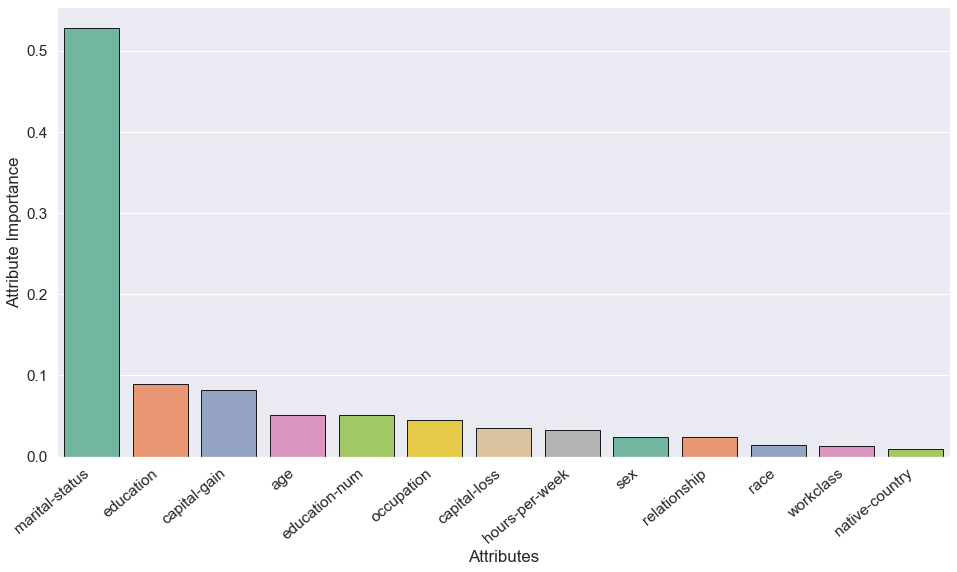

In [102]:
# Find out which attributes are important for the model building by the help of the bar plot

feat_importances = pd.Series(model.feature_importances_, index = X_train.columns)
feat_importances = feat_importances.nlargest(X_train.shape[1])
ax = sns.barplot(feat_importances.index, feat_importances.values, edgecolor = "k", palette = "Set2")
ax.set_ylabel("Attribute Importance")
ax.set_xlabel("Attributes")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

In [103]:
final_train.drop(["race", "workclass", "native-country"], axis = 1, inplace = True)
final_test.drop(["race", "workclass", "native-country"], axis = 1, inplace = True)

# 8. Model Selection

In [104]:
# Import the package to find out the cross_validation_score

from sklearn.model_selection import cross_val_score

8.1. XGBoost Classifier

In [105]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
score_xgb = cross_val_score(xgb_classifier, X, y, cv = 5, n_jobs = -1)

8.2. Random Forest Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
score_rf = cross_val_score(rf, X, y, cv = 5, n_jobs = -1)

8.3. Support Vector Classifier

In [107]:
from sklearn.svm import SVC
svc = SVC()
score_svc = cross_val_score(svc, X, y, cv = 5, n_jobs = -1)

8.4. Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
score_logReg = cross_val_score(logReg, X, y, cv = 5, n_jobs = -1)

8.5. K-Nearest Neighbour Classifier

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
score_knn = cross_val_score(knn, X, y, cv = 5, n_jobs = -1)

8.6. ADABoost Classifier

In [110]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
score_adaboost = cross_val_score(adaboost, X, y, cv = 5, n_jobs = -1)

In [111]:
# Print the Accuracy Score of all the Model

scores = pd.DataFrame({"Model" : ["XGBoost", "Random Forest", "SVC", "Logistic Regression", "KNN", "Adaboost"],
                       "Accuracy" : [score_xgb.mean(), score_rf.mean(), score_svc.mean(), score_logReg.mean(), score_knn.mean(),
                                     score_adaboost.mean()]})

print(scores)

                 Model  Accuracy
0              XGBoost  0.898957
1        Random Forest  0.897561
2                  SVC  0.841581
3  Logistic Regression  0.818276
4                  KNN  0.867064
5             Adaboost  0.851309


# 9. Final Model Evaluation

At this point, we are going to evaluate the model in the initial test set.

In [112]:
# For "final_train" dataset

X_train = final_train.drop("income", axis = 1)
y_train = final_train["income"]

# For "final_test" dataset

X_test = final_test.drop("income", axis = 1)
y_test = final_test["income"]

In [113]:
# We are going to use the "XGBoost Classifier" here, because it got us the highest accuracy

xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)

In [114]:
# Print the Confusion Matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[11084  1351]
 [  939  2907]]


In [115]:
# Print the Accuracy Score

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8593452490633253


In [116]:
# Print the Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91     12435
           1       0.68      0.76      0.72      3846

    accuracy                           0.86     16281
   macro avg       0.80      0.82      0.81     16281
weighted avg       0.87      0.86      0.86     16281



In [117]:
# Print the roc_auc_score

from sklearn.metrics import roc_auc_score
xgboost_auc = roc_auc_score(y_test, y_pred)
r_probs = [0 for _ in range(len(y_test))]
random_auc = roc_auc_score(y_test, r_probs)
print(xgboost_auc)

0.8236026401249055


In [118]:
# Find out the probability of the X_test

probs = xgb_classifier.predict_proba(X_test)

In [119]:
probs = probs[:, 1]                  # Keep probabilities for one class

In [120]:
# Import the package to draw the roc_curve

from sklearn.metrics import roc_curve
r_fpr, r_tpr, _ = roc_curve(y_test, probs)
x = np.arange(0, 1.01, 0.01)

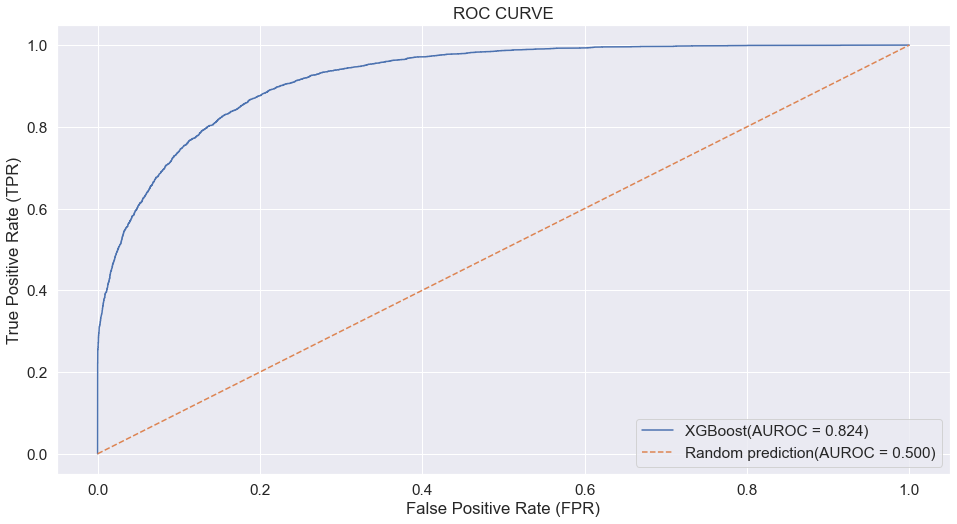

In [121]:
# Plot the ROC Curve

plt.plot(r_fpr, r_tpr, label = "XGBoost(AUROC = %0.3f)" % xgboost_auc)
plt.plot(x, x, linestyle = '--', label = "Random prediction(AUROC = %0.3f)" % random_auc)
plt.legend()
plt.title("ROC CURVE")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.show()

# THE END OF THE ANALYSIS